In [1]:
import psycopg2
from pprint import pprint
import pandas.io.sql as sqlio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect to an existing database
conn = psycopg2.connect("dbname=postgres user=sejaldua")

In [3]:
# Open a cursor to perform database operations
cur = conn.cursor()

# Query the database and obtain data as Python objects
cur.execute("SELECT * FROM olympics;")
cur.fetchone()

(466,
 'Piroska Abos Gvorgyzakab',
 'F',
 '25',
 'NA',
 'NA',
 'Spain',
 'ESP',
 '1988 Winter',
 1988,
 'Winter',
 'Calgary',
 'Cross Country Skiing',
 "Cross Country Skiing Women's 20 kilometres",
 'NA')

In [4]:
# preview the dataset
sql = "SELECT * FROM olympics"
master_df = sqlio.read_sql_query(sql, conn)
master_df

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,466,Piroska Abos Gvorgyzakab,F,25,NA,NA,Spain,ESP,1988 Winter,1988,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Women's 20 kilometres,NA
1,467,Jean-Pierre Abossolo-Ze,M,27,NA,NA,Cameroon,CMR,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 400 metres Hurdles,NA
2,467,Jean-Pierre Abossolo-Ze,M,27,NA,NA,Cameroon,CMR,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,NA
3,468,Abdelhalim Muhammad Abou,M,27,210,88,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Volleyball,Volleyball Men's Volleyball,NA
4,469,Tarek Abou Al Dahab,M,28,170,64,Lebanon,LIB,1968 Summer,1968,Summer,Mexico City,Cycling,"Cycling Men's Road Race, Individual",NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,464,Abdul Razzak Aboobakur,M,25,168,59,Maldives,MDV,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 4 x 100 metres Relay,NA
271112,465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NA
271113,465,"Matthew ""Matt"" Abood",M,30,197,92,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
271114,466,Piroska Abos Gvorgyzakab,F,25,NA,NA,Spain,ESP,1988 Winter,1988,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Women's 5 kilometres,NA


## Rapid-Fire Q&A

In [5]:
# How many teams are there?
sql = """
SELECT COUNT(DISTINCT noc) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,230


In [6]:
# How many sports are there?
sql = """
SELECT COUNT(DISTINCT sport) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,66


In [7]:
# How many events are there?
sql = """
SELECT COUNT(DISTINCT event) FROM olympics
"""
sqlio.read_sql_query(sql, conn)

,count
0,765


## Youngest, Oldest, Heaviest, Lightest, Tallest, Shortest

In [8]:
# Who are the top 5 youngest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, event,noc, games, city, medal FROM olympics
WHERE age <> 'NA'
ORDER BY age
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,event,noc,games,city,medal
0,Dimitrios Loundras,10,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",GRE,1896 Summer,Athina,Bronze
1,Beatrice Hutiu,11,Figure Skating,Figure Skating Women's Singles,ROU,1968 Winter,Grenoble,NA
2,Carlos Bienvenido Front Barrera,11,Rowing,Rowing Men's Coxed Eights,ESP,1992 Summer,Barcelona,NA
3,Etsuko Inada,11,Figure Skating,Figure Skating Women's Singles,JPN,1936 Winter,Garmisch-Partenkirchen,NA
4,Liana Vicens,11,Swimming,Swimming Women's 100 metres Breaststroke,PUR,1968 Summer,Mexico City,NA


In [9]:
# Who are the top 5 oldest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, event,noc, games, city, medal FROM olympics
WHERE age <> 'NA'
ORDER BY age DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,event,noc,games,city,medal
0,John Quincy Adams Ward,97,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",USA,1928 Summer,Amsterdam,NA
1,Winslow Homer,96,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,NA
2,Thomas Cowperthwait Eakins,88,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",USA,1932 Summer,Los Angeles,NA
3,George Denholm Armour,84,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",GBR,1948 Summer,London,NA
4,Louis Tauzin,81,Art Competitions,Art Competitions Mixed Sculpturing,FRA,1924 Summer,Paris,NA


In [10]:
# Who are the top 5 oldest athletes to ever compete in the Games, excluding 'Art Competitions'?
# NOTE: art competitions were a part of the Olympics for a brief period of time (1912-1948)
sql = """
SELECT DISTINCT name, CAST(age AS INTEGER), sport, noc, games, city FROM olympics
WHERE age <> 'NA' AND sport IN (SELECT DISTINCT sport FROM olympics WHERE year = 2016)
ORDER BY age DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,sport,noc,games,city
0,Arthur von Pongracz de Szent-Mikls und vr,72,Equestrianism,AUT,1936 Summer,Berlin
1,Oscar Gomer Swahn,72,Shooting,SWE,1920 Summer,Antwerpen
2,Charles William Martin,71,Sailing,FRA,1900 Summer,Paris
3,Hiroshi Hoketsu,71,Equestrianism,JPN,2012 Summer,London
4,Thomas Foster Scott,71,Archery,USA,1904 Summer,St. Louis


In [18]:
# Who are the top 5 heaviest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name, (CAST(weight AS DECIMAL) * 2.2) as weight_lbs, sport, event, noc, games, city, medal FROM olympics
WHERE weight <> 'NA'
ORDER BY weight_lbs DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,weight_lbs,sport,event,noc,games,city,medal
0,"Ricardo Blas, Jr.",470.8,Judo,Judo Men's Heavyweight,GUM,2008 Summer,Beijing,NA
1,"Ricardo Blas, Jr.",470.8,Judo,Judo Men's Heavyweight,GUM,2012 Summer,London,NA
2,Aytami Ruano Vega,435.6,Judo,Judo Men's Heavyweight,ESP,2004 Summer,Athina,NA
3,Marek Galiski,418.0,Wrestling,"Wrestling Men's Super-Heavyweight, Greco-Roman",POL,1980 Summer,Moskva,NA
4,"Christopher J. ""Chris"" Taylor",400.4,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",USA,1972 Summer,Munich,Bronze


In [19]:
# Who are the top 5 lightest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name, (CAST(weight AS DECIMAL) * 2.2) as weight_lbs, sport, noc, games, city, medal FROM olympics
WHERE weight <> 'NA'
ORDER BY weight_lbs
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,weight_lbs,sport,noc,games,city,medal
0,Choi Myong-Hui,55.0,Gymnastics,PRK,1980 Summer,Moskva,NA
1,"Albert Ferdinand ""Al"" Zerhusen",61.6,Football,USA,1956 Summer,Melbourne,NA
2,Anita Jokiel,61.6,Gymnastics,POL,1980 Summer,Moskva,NA
3,Kana Yamawaki,61.6,Gymnastics,JPN,2000 Summer,Sydney,NA
4,Wang Xin (Ruoxue-),61.6,Diving,CHN,2008 Summer,Beijing,Bronze


In [38]:
# Who are the top 5 tallest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name,
    CAST(TRUNC((CAST(height AS DECIMAL) * 0.394) / 12) AS INTEGER) AS height_ft,
    CAST((CAST(height AS DECIMAL) * 0.394) % 12 AS INTEGER) AS height_in,
    sport, noc, medal FROM olympics
WHERE height <> 'NA'
ORDER BY height_ft DESC, height_in DESC
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,height_ft,height_in,sport,noc,medal
0,Yao Ming,7,5,Basketball,CHN,NA
1,Arvydas Romas Sabonis,7,4,Basketball,LTU,Bronze
2,Arvydas Romas Sabonis,7,4,Basketball,URS,Gold
3,Tommy Loren Burleson,7,4,Basketball,USA,Silver
4,Gunther Behnke,7,3,Basketball,GER,NA


In [43]:
# Who are the top 5 shortest athletes to ever compete in the Games?
sql = """
SELECT DISTINCT name, age, weight,
    CAST(TRUNC((CAST(height AS DECIMAL) * 0.394) / 12) AS INTEGER) AS height_ft,
    CAST((CAST(height AS DECIMAL) * 0.394) % 12 AS INTEGER) AS height_in,
    sport, noc, medal FROM olympics
WHERE height <> 'NA'
ORDER BY height_ft, height_in
LIMIT 5
"""
sqlio.read_sql_query(sql, conn)

,name,age,weight,height_ft,height_in,sport,noc,medal
0,Helman Palije,21,74,4,2,Boxing,MAW,NA
1,Lyton Levison Mphande,25,62,4,2,Boxing,MAW,NA
2,Rosario Briones,15,42,4,2,Gymnastics,MEX,NA
3,Boston Simbeye,28,67,4,3,Boxing,MAW,NA
4,Salvador Miranda,22,51,4,3,Boxing,NCA,NA


## Visualizing athlete counts, aggregated in various ways

### Number of Athletes Competing over Time

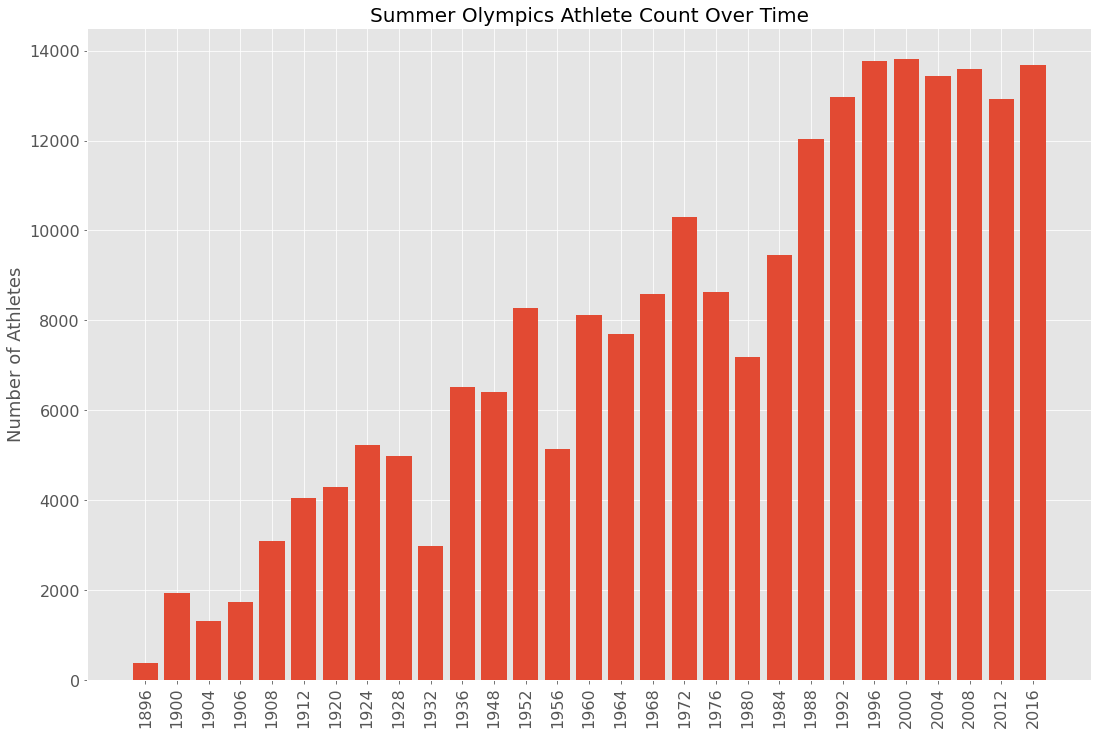

In [155]:
sql = """
SELECT year, COUNT(*) AS num_athletes FROM olympics
WHERE season = 'Summer'
GROUP BY year
"""
df = sqlio.read_sql_query(sql, conn)
# df
fig = plt.figure(figsize=(18,12))
plt.bar(df['year'].astype(str), df['num_athletes'])
plt.title('Summer Olympics Athlete Count Over Time', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.ylabel('Number of Athletes', fontsize=18)
fig.savefig("./figures/num_athletes_over_time.png")

### Number of Athletes per Sport

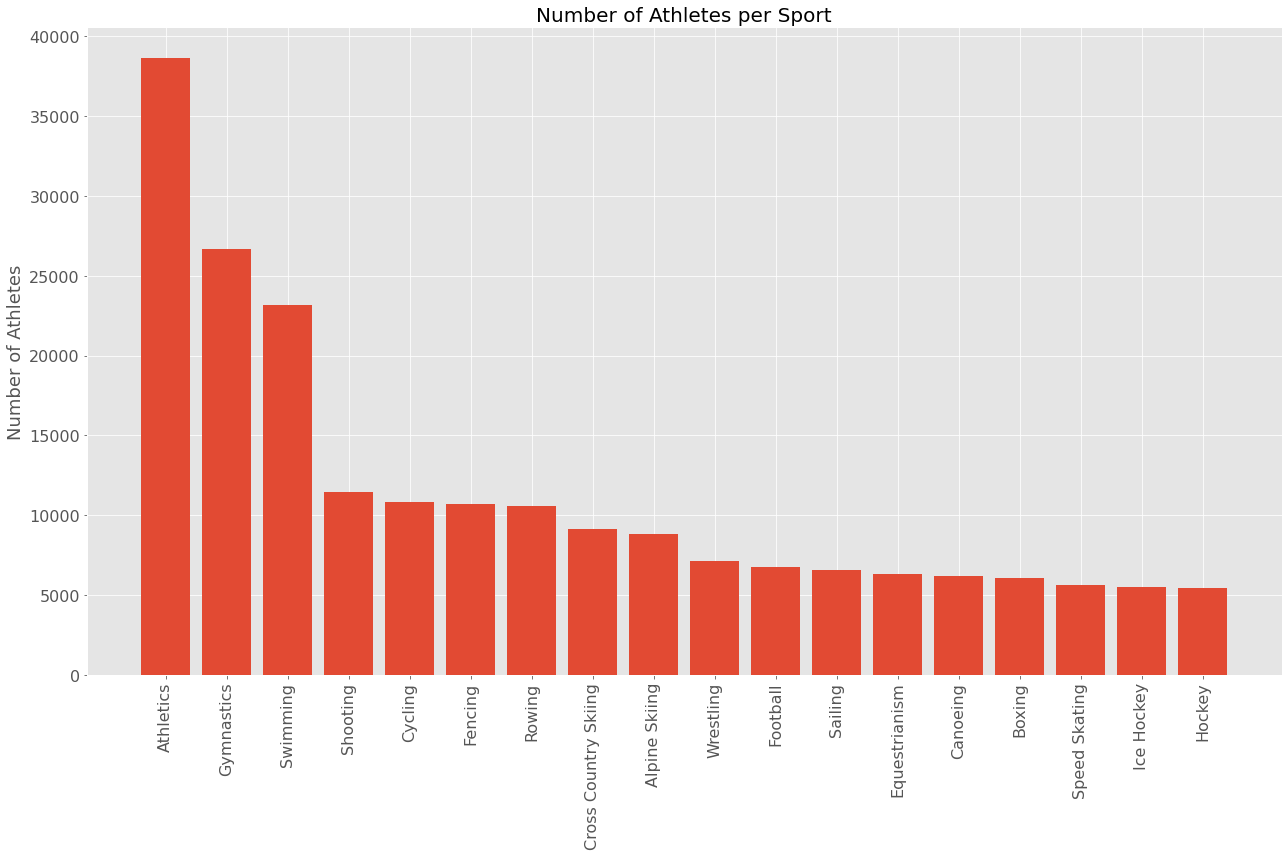

In [157]:
sql = """
SELECT sport, COUNT(*) AS num_athletes FROM olympics
GROUP BY sport
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['num_athletes'])
plt.ylabel('Number of Athletes', fontsize=18)
plt.title('Number of Athletes per Sport', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout();
fig.savefig("./figures/num_athletes_per_sport.png")


### Number of Events per Sport

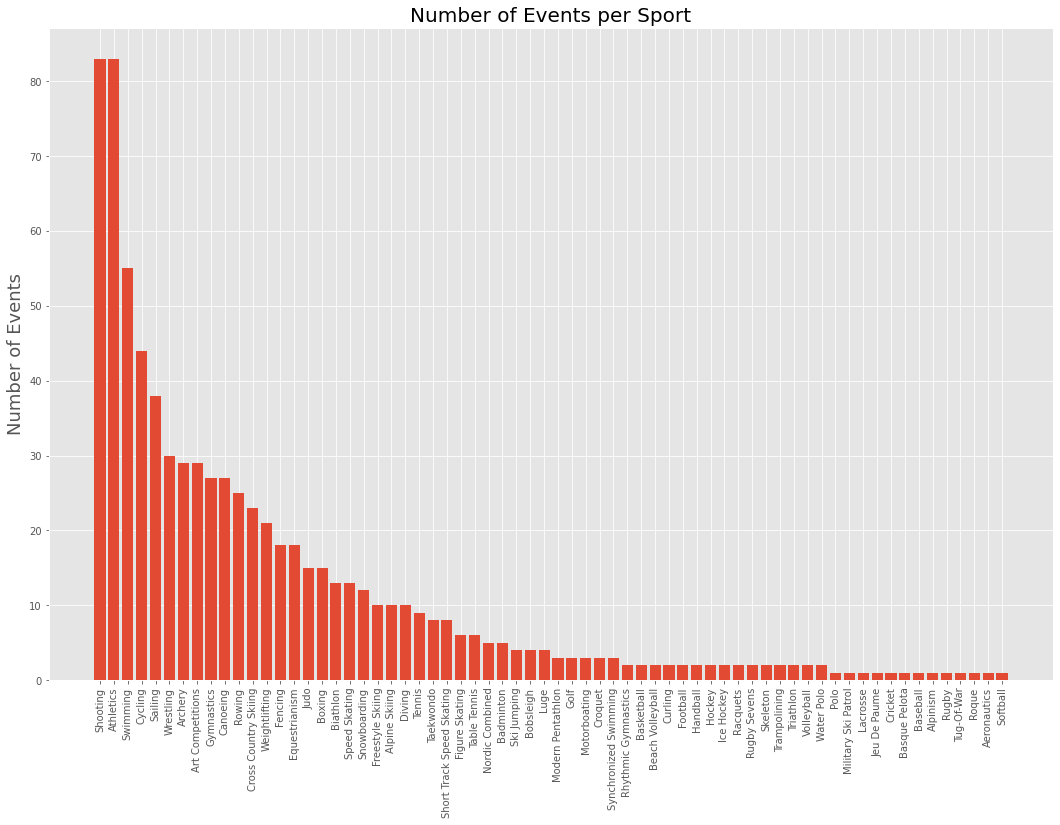

In [28]:
sql = """
SELECT sport, COUNT(DISTINCT event) FROM olympics
GROUP BY sport
ORDER BY COUNT(DISTINCT event) DESC
"""
df = sqlio.read_sql_query(sql, conn)
# df
fig = plt.figure(figsize=(18,12))
plt.bar(df['sport'], df['count'])
plt.ylabel('Number of Events', fontsize=18)
plt.title('Number of Events per Sport', fontsize=20)
plt.xticks(rotation=90);
fig.savefig("./figures/num_events_per_sport.png")

### Number of Athletes per Region

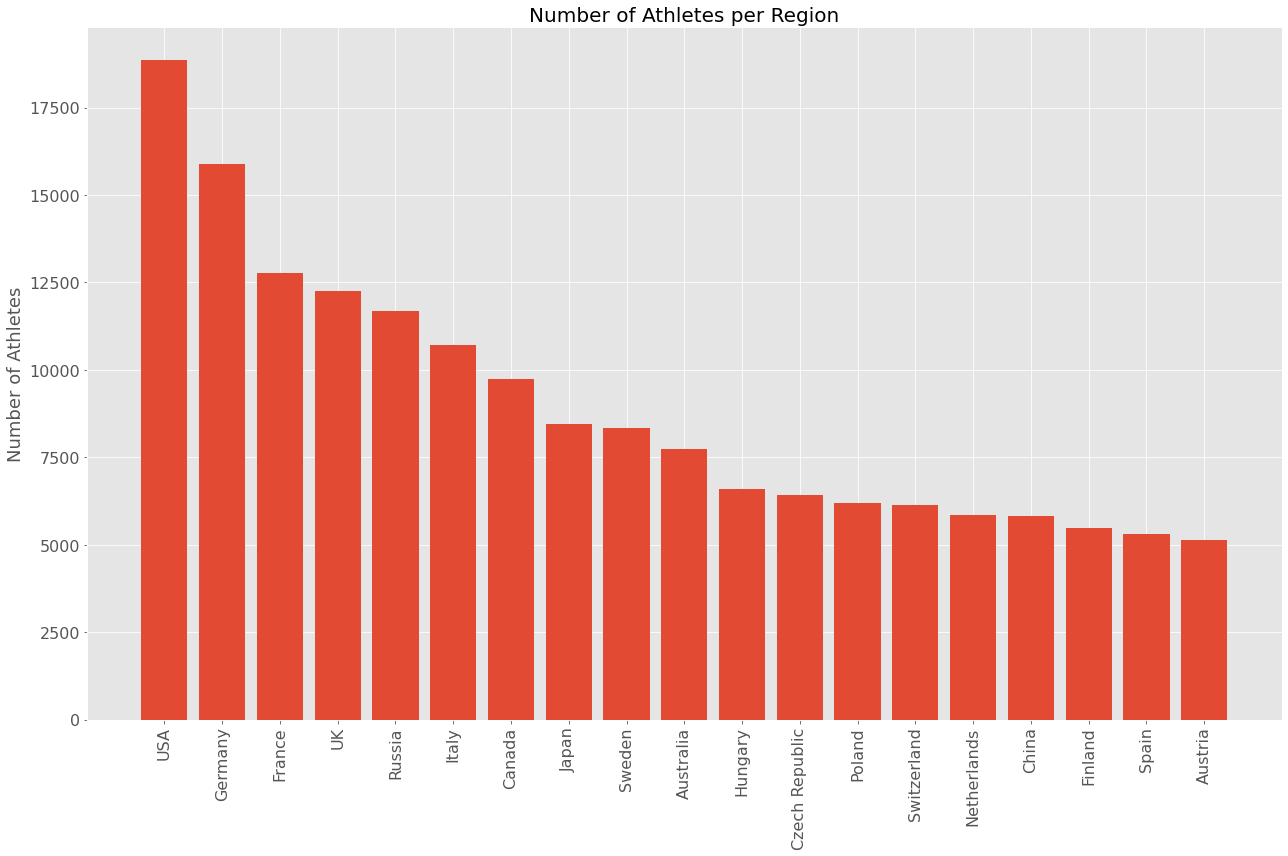

In [95]:
sql = """
SELECT region, COUNT(*) AS num_athletes FROM olympics
LEFT JOIN noc_regions
ON noc_regions.noc = olympics.noc
GROUP BY region
HAVING COUNT(*) > 5000
ORDER BY COUNT(*) DESC
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(18,12))
plt.bar(df['region'][:20], df['num_athletes'][:20])
plt.ylabel('Number of Athletes', fontsize=18)
plt.title('Number of Athletes per Region', fontsize=20)
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
plt.tight_layout();
fig.savefig("./figures/num_athletes_per_region.png")

## Reigning lady ballers!

In [82]:
sql = """
SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold'
GROUP BY year, region
ORDER BY year DESC
"""
sqlio.read_sql_query(sql, conn)

,year,gold
0,2016,USA
1,2012,USA
2,2008,USA
3,2004,USA
4,2000,USA
5,1996,USA
6,1992,Russia
7,1988,USA
8,1984,USA
9,1980,Russia


In [79]:
sql = """
SELECT G.year, G.gold, S.silver FROM 
(SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold'
GROUP BY year, region) G,
(SELECT year, region AS silver FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Silver'
GROUP BY year, region) S
WHERE G.year = S.year
ORDER BY year DESC
"""
sqlio.read_sql_query(sql, conn)

,year,gold,silver
0,2016,USA,Spain
1,2012,USA,France
2,2008,USA,Australia
3,2004,USA,Australia
4,2000,USA,Australia
5,1996,USA,Brazil
6,1992,Russia,China
7,1988,USA,Serbia
8,1984,USA,South Korea
9,1980,Russia,Bulgaria


Sheesh. USA Women's Basketball team has not had a taste of defeat since 1992. That is 6 straight Gold medals!

In [6]:
sql = """
SELECT name, COUNT(*) FROM olympics
WHERE sport = 'Basketball' and sex = 'F' and medal = 'Gold' and noc = 'USA'
GROUP BY name
HAVING COUNT(*) >= 3
ORDER BY count DESC
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,count
0,Lisa Deshawn Leslie (-Lockwood),4
1,"Suzanne Brigit ""Sue"" Bird",4
2,Diana Lurena Taurasi,4
3,Tamika Devonne Catchings,4
4,Teresa Edwards,4
5,Sheryl Denice Swoopes,3
6,"Katherine May ""Katie"" Smith",3
7,Seimone Delicia Augustus,3
8,Dawn Michelle Staley,3
9,Sylvia Shaqueria Fowles,3


These queens have showed up 3+ times, bringing home the Gold and making Team USA proud!

## What about Team USA men's basketball?

In [81]:
sql = """
SELECT G.year, G.gold, S.silver FROM 
(SELECT year, region AS gold FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'M' and medal = 'Gold'
GROUP BY year, region) G,
(SELECT year, region AS silver FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Basketball' and sex = 'M' and medal = 'Silver'
GROUP BY year, region) S
WHERE G.year = S.year
ORDER BY year DESC
LIMIT 8
"""
sqlio.read_sql_query(sql, conn)

,year,gold,silver
0,2016,USA,Serbia
1,2012,USA,Spain
2,2008,USA,Spain
3,2004,Argentina,Italy
4,2000,USA,France
5,1996,USA,Serbia
6,1992,USA,Croatia
7,1988,Russia,Serbia


Looks like they have secured 6 gold medals over the last 7 Olympic Games! Pretty impressive. Top contenders include Serbia, Spain, France, and Croatia.

## Top 10 Team USA female gymnasts

In [72]:
sql = """
SELECT name, COUNT(*) AS num_medals FROM olympics
WHERE medal <> 'NA' and season = 'Summer' AND sport = 'Gymnastics' AND sex = 'F' AND noc = 'USA'
GROUP BY name
ORDER BY COUNT(*) DESC
LIMIT 10
"""
sqlio.read_sql_query(sql, conn)

,name,num_medals
0,"Shannon Lee Miller (-Phillips, -Falconetti)",7
1,"Alexandra Rose ""Aly"" Raisman",6
2,Mary Lou Retton (-Kelley),5
3,Simone Arianne Biles,5
4,"Anastasiya Valeryevna ""Nastia"" Liukin",5
5,Dominique Margaux Dawes (-Thompson),4
6,Shawn Machel Johnson (-East),4
7,Julianne Lyn McNamara (-Zeile),3
8,"Gabrielle Christina Victoria ""Gabby"" Douglas",3
9,Carly Rae Patterson (-Caldwell),3


If Simone Biles collects just 3 more medals this year, she will become the most decorated Team USA female gymnast!

## Players to potentially look out for on the tennis court this year

In [78]:
sql = """
SELECT DISTINCT name, sex, noc FROM olympics
WHERE medal <> 'NA' and season = 'Summer' AND sport = 'Tennis' AND year = '2016'
ORDER BY noc
"""
sqlio.read_sql_query(sql, conn)

,name,sex,noc
0,Juan Martn del Potro,M,ARG
1,Barbora Strcov (-Zhlavov),F,CZE
2,Lucie Hradeck,F,CZE
3,Lucie afov,F,CZE
4,Petra Kvitov,F,CZE
5,Radek tpnek,M,CZE
6,Marc Lpez i Tarrs,M,ESP
7,Rafael Nadal Parera,M,ESP
8,"Andrew Barron ""Andy"" Murray",M,GBR
9,Angelique Kerber,F,GER


... and don't forget about Naomi Osaka, playing for Japan in her first ever Olympic debut!

## Analyzing athletic build (height and weight) by sport

In [47]:
sql = """
SELECT F.sport, F.min AS F_min, F.avg AS F_avg, F.max AS F_max, M.min AS M_min, M.avg AS M_avg, M.max AS M_max, (F.avg + M.avg) AS avg_sum FROM
    (
        SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
        FROM olympics
        WHERE sex = 'F' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) F,
    (
        SELECT sport, MIN(CAST(height AS INTEGER)), ROUND(AVG(CAST(height AS INTEGER)), 2) AS avg, MAX(CAST(height AS INTEGER))
        FROM olympics
        WHERE sex = 'M' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) M
WHERE F.sport = M.sport
ORDER BY avg_sum;
"""
df = sqlio.read_sql_query(sql, conn)
df

,sport,f_min,f_avg,f_max,m_min,m_avg,m_max,avg_sum
0,Gymnastics,127,156.16,179,150,167.61,188,323.77
1,Weightlifting,141,160.47,190,140,169.15,205,329.62
2,Diving,137,161.28,178,148,171.65,188,332.93
3,Figure Skating,137,160.55,180,156,176.04,193,336.59
4,Wrestling,147,163.87,180,137,172.91,214,336.78
5,Ski Jumping,152,164.31,175,156,176.65,200,340.96
6,Shooting,146,164.93,190,132,176.07,213,341.00
7,Boxing,150,168.68,184,127,172.84,208,341.52
8,Hockey,138,166.21,190,150,176.86,200,343.07
9,Judo,143,166.21,193,145,177.48,213,343.69


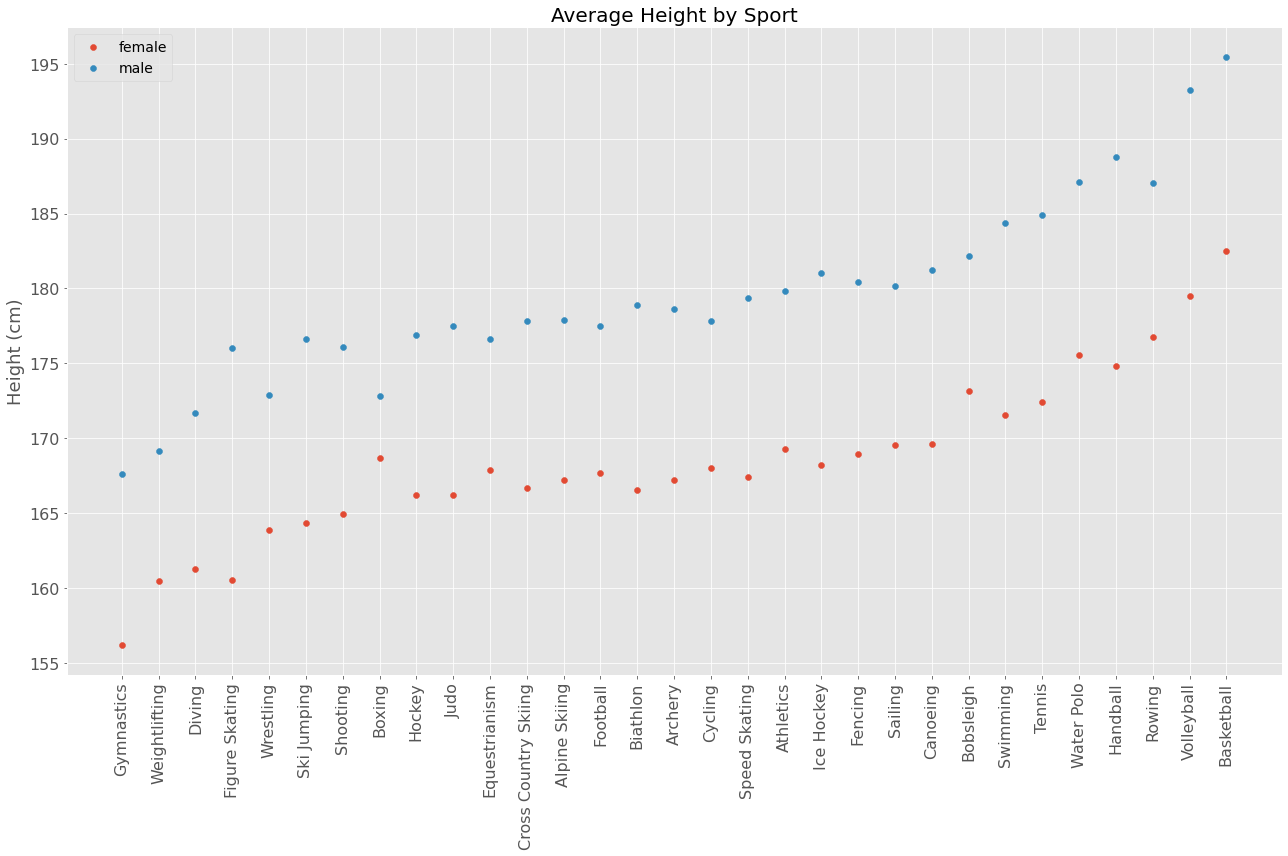

In [48]:
fig = plt.figure(figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label='female')
plt.scatter(df['sport'], df['m_avg'], label='male')
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16)
plt.ylabel('Height (cm)', fontsize=18);
plt.title('Average Height by Sport', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
fig.savefig('./figures/avg_height_by_sport.png')

In [49]:
sql = """
SELECT F.sport, F.min AS F_min, F.avg AS F_avg, F.max AS F_max, M.min AS M_min, M.avg AS M_avg, M.max AS M_max, (F.avg + M.avg) AS avg_sum FROM
    (
        SELECT sport, MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
        FROM olympics
        WHERE sex = 'F' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) F,
    (
        SELECT sport, MIN(CAST(weight AS DECIMAL)), ROUND(AVG(CAST(weight AS DECIMAL)), 2) AS avg, MAX(CAST(weight AS DECIMAL))
        FROM olympics
        WHERE sex = 'M' AND height <> 'NA' AND weight <> 'NA' AND sport IN (
            SELECT sport FROM olympics
            GROUP BY sport
            HAVING COUNT(*) > 2000
    )
    GROUP BY sport
    ORDER BY avg) M
WHERE F.sport = M.sport
ORDER BY avg_sum;
"""
df = sqlio.read_sql_query(sql, conn)
df

,sport,f_min,f_avg,f_max,m_min,m_avg,m_max,avg_sum
0,Gymnastics,25.0,47.79,72.0,46.0,63.34,102.0,111.13
1,Ski Jumping,43.0,52.62,62.0,50.0,65.25,85.0,117.87
2,Figure Skating,32.0,49.86,68.0,47.0,69.59,90.0,119.45
3,Diving,28.0,53.57,75.0,37.0,67.07,91.0,120.64
4,Boxing,50.0,61.64,79.0,46.0,65.29,140.0,126.93
5,Cross Country Skiing,42.0,57.49,77.0,53.0,71.70,100.0,129.19
6,Equestrianism,43.0,58.60,85.0,50.0,70.92,100.0,129.52
7,Biathlon,45.0,57.31,72.0,51.0,72.63,95.0,129.94
8,Cycling,45.0,59.77,92.0,48.0,72.19,104.0,131.96
9,Hockey,45.0,60.53,80.0,48.0,73.34,105.0,133.87


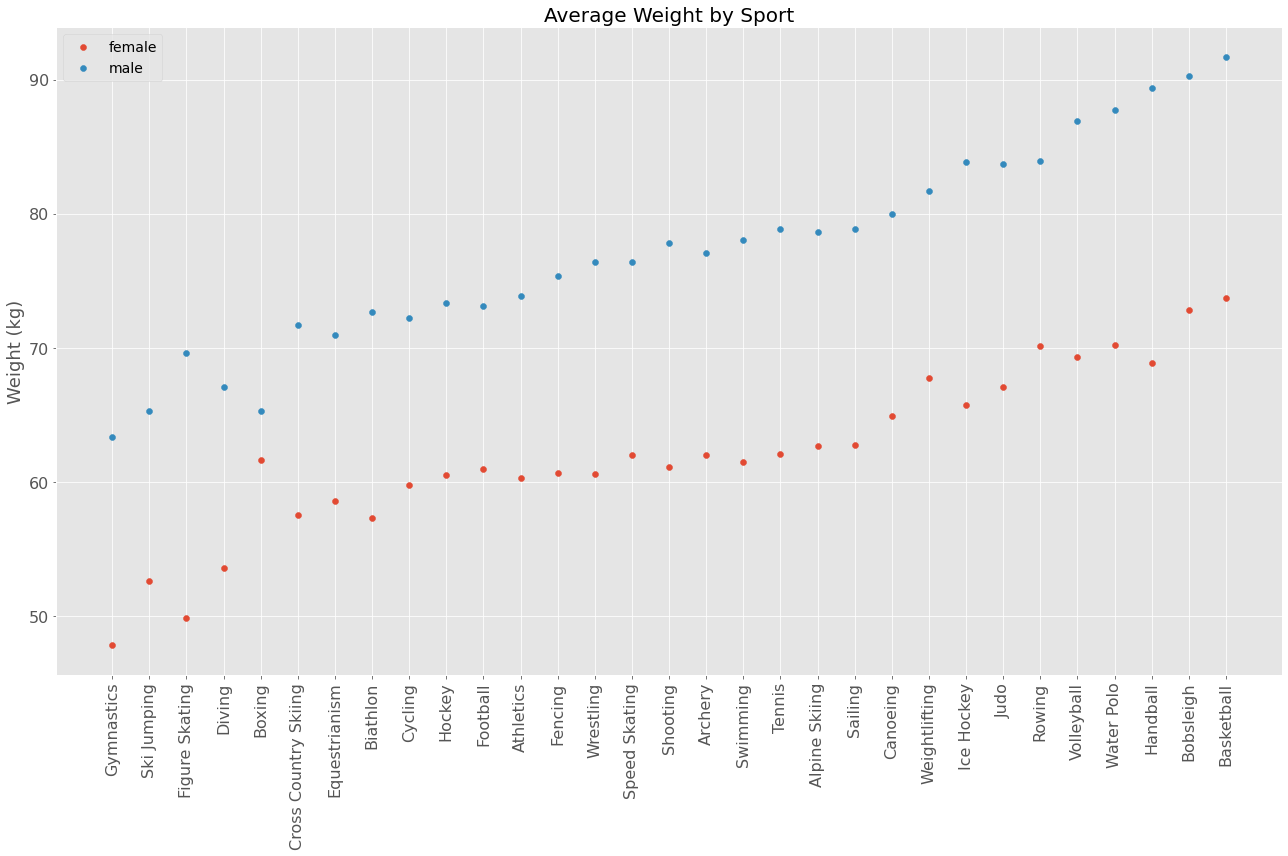

In [50]:
fig = plt.figure(figsize=(18,12))
plt.scatter(df['sport'], df['f_avg'], label='female')
plt.scatter(df['sport'], df['m_avg'], label='male')
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16)
plt.ylabel('Weight (kg)', fontsize=18);
plt.title('Average Weight by Sport', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
fig.savefig('./figures/avg_weight_by_sport.png')

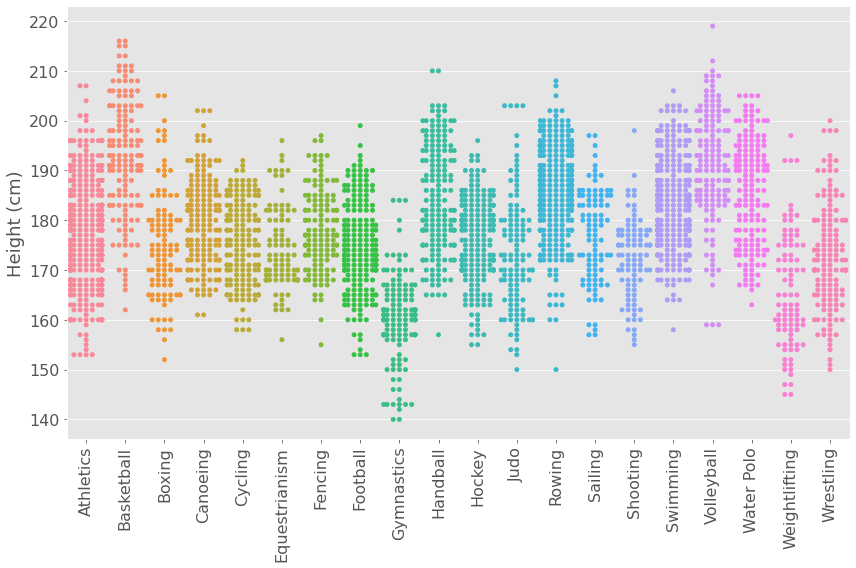

In [54]:
sql = """
SELECT sport, CAST(height AS INTEGER) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND height <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='height')
plt.ylabel('Height (cm)', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/height_swarmplot.png')

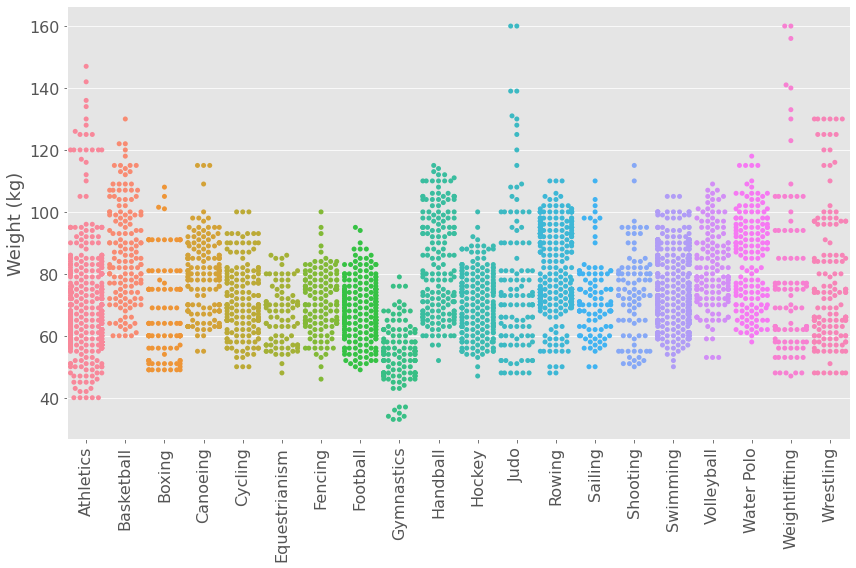

In [55]:
sql = """
SELECT sport, CAST(weight AS DECIMAL) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND weight <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='weight')
plt.ylabel('Weight (kg)', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/weight_swarmplot.png')

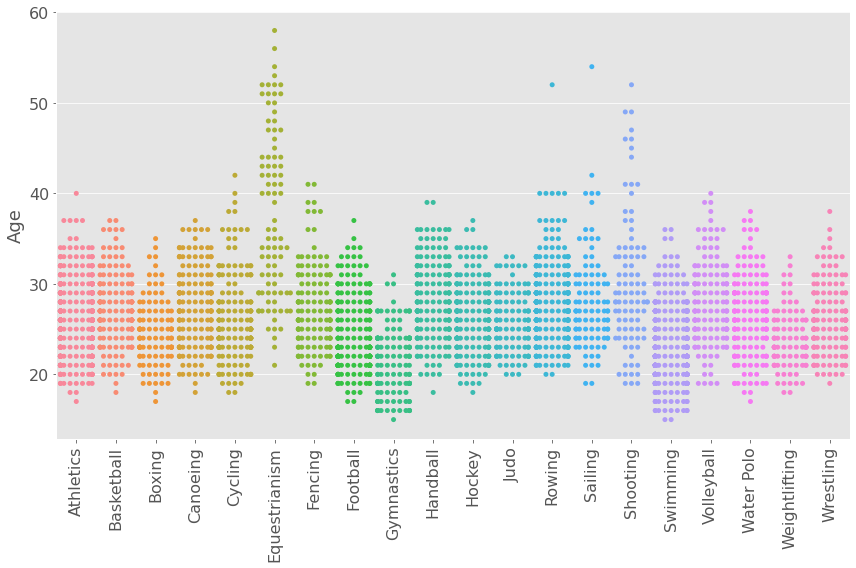

In [56]:
sql = """
SELECT sport, CAST(age AS INTEGER) FROM olympics
WHERE sport IN (
    SELECT sport FROM olympics
    GROUP BY sport
    HAVING COUNT(*) > 3000
) AND age <> 'NA' AND season = 'Summer' and year >= 2012 AND medal <> 'NA'
ORDER BY sport
"""
df = sqlio.read_sql_query(sql, conn)
df
fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90, fontsize=16);
plt.yticks(fontsize=16);
sns.swarmplot(data=df, x='sport', y='age')
plt.ylabel('Age', fontsize=18);
plt.xlabel('')
plt.tight_layout()
fig.savefig('./figures/age_swarmplot.png')

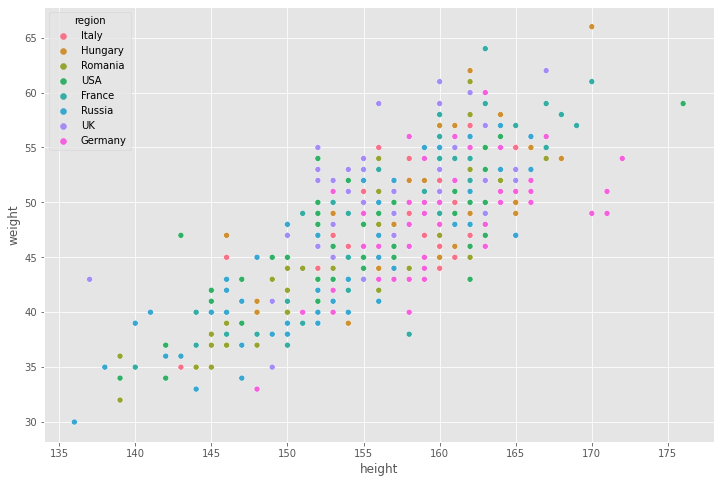

In [58]:
sql = """
SELECT DISTINCT name, CAST(height AS INTEGER), CAST(weight AS DECIMAL), region
FROM olympics
LEFT JOIN noc_regions
ON olympics.noc = noc_regions.noc
WHERE sport = 'Gymnastics' AND sex = 'F' AND height <> 'NA' AND weight <> 'NA' 
AND region IN
(
    SELECT region FROM olympics
    LEFT JOIN noc_regions
    ON olympics.noc = noc_regions.noc
    WHERE sport = 'Gymnastics' AND sex = 'F'
    GROUP BY region
    ORDER BY COUNT(DISTINCT name) DESC
    LIMIT 8
)
"""
df = sqlio.read_sql_query(sql, conn)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='height', y='weight', hue='region')
fig.savefig('./figures/gymnastics_athletic_build_by_country_scatterplot.png')

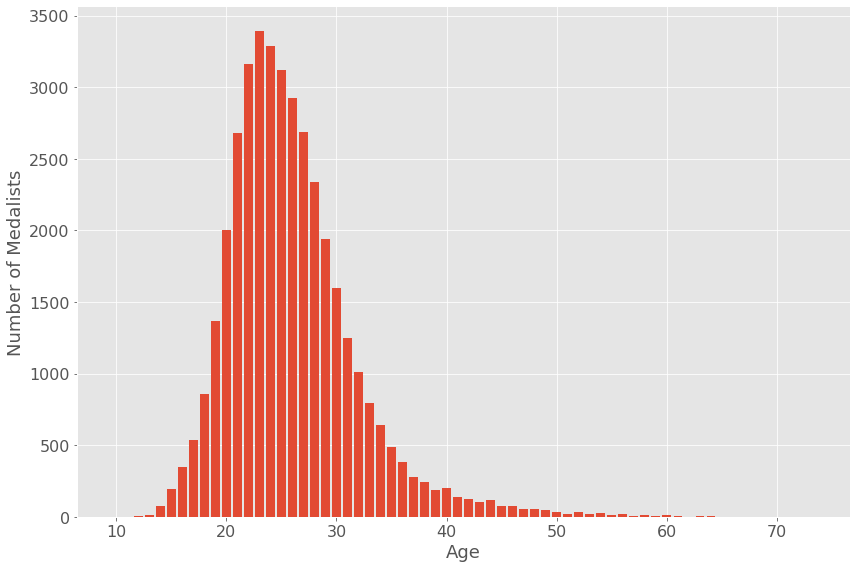

In [59]:
# Age Distribution of Olympic Medalists
sql = """
SELECT CAST(age AS INTEGER), COUNT(*) AS num_medalists
FROM olympics
WHERE age <> 'NA' AND medal <> 'NA'
GROUP BY age
"""
df = sqlio.read_sql_query(sql, conn)
fig = plt.figure(figsize=(12,8))
plt.bar(df['age'], df['num_medalists'])
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Age', fontsize=18)
plt.ylabel('Number of Medalists', fontsize=18);
plt.tight_layout()
fig.savefig('./figures/age_distribution_of_medalists.png')

In [60]:
# Top 10 most decorated olympians, ranked by weighted sum of medals earned
sql = """
SELECT
  name, sex, noc, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
GROUP BY 
  name, sex, noc, sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,sex,noc,sport,sum
0,"Michael Fred Phelps, II",M,USA,Swimming,77
1,Larysa Semenivna Latynina (Diriy-),F,URS,Gymnastics,41
2,Nikolay Yefimovich Andrianov,M,URS,Gymnastics,34
3,Ole Einar Bjrndalen,M,NOR,Biathlon,33
4,Paavo Johannes Nurmi,M,FIN,Athletics,33
5,Sawao Kato,M,JPN,Gymnastics,31
6,Borys Anfiyanovych Shakhlin,M,URS,Gymnastics,31
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,USA,Swimming,31
8,Edoardo Mangiarotti,M,ITA,Fencing,30
9,"Raymond Clarence ""Ray"" Ewry",M,USA,Athletics,30


In [64]:
# Top 10 most decorated olympians, ranked by number of medals earned
sql = """
SELECT
  name, sex, noc, sport, COUNT(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 1
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_medals
FROM 
  olympics
GROUP BY 
  name, sex, noc, sport
ORDER BY num_medals DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,sex,noc,sport,num_medals
0,Robert Tait McKenzie,M,CAN,Art Competitions,58
1,Heikki Ilmari Savolainen,M,FIN,Gymnastics,39
2,"Joseph ""Josy"" Stoffel",M,LUX,Gymnastics,38
3,Ioannis Theofilakis,M,GRE,Shooting,36
4,Jean Lucien Nicolas Jacoby,M,LUX,Art Competitions,32
5,Takashi Ono,M,JPN,Gymnastics,32
6,Alexandros Theofilakis,M,GRE,Shooting,32
7,Michel Mathiot,M,FRA,Gymnastics,31
8,"Alfred August ""Al"" Jochim",M,USA,Gymnastics,31
9,Alfred James Munnings,M,GBR,Art Competitions,31


In [65]:
# Top 10 most decorated female olympians, in order of most gold medals
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'F'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,9,5,4
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,8,3,1
2,Vra slavsk (-Odloilov),TCH,Gymnastics,7,4,0
3,Amy Deloris Van Dyken (-Rouen),USA,Swimming,6,0,0
4,Kristin Otto,GDR,Swimming,6,0,0
5,Allyson Michelle Felix,USA,Athletics,6,3,0
6,Maria Valentina Vezzali,ITA,Fencing,6,1,2
7,Marit Bjrgen,NOR,Cross Country Skiing,6,3,1
8,Lidiya Pavlovna Skoblikova (-Polozkova),URS,Speed Skating,6,0,0
9,Isabelle Regina Werth,GER,Equestrianism,6,4,0


In [66]:
# Top 10 most decorated male olympians, in order of most gold medals
sql = """
SELECT
  name, noc, sport, 
             SUM(CASE medal
                WHEN 'Gold' THEN 1
                ELSE 0
                END) AS num_gold,
             SUM(CASE medal
                WHEN 'Silver' THEN 1
                ELSE 0
                END) AS num_silver,
            SUM(CASE medal
             WHEN 'Bronze' THEN 1
             ELSE 0
             END) AS num_bronze
FROM 
  olympics
WHERE sex = 'M'
GROUP BY 
  name, noc, sport
ORDER BY num_gold DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df

,name,noc,sport,num_gold,num_silver,num_bronze
0,"Michael Fred Phelps, II",USA,Swimming,23,3,2
1,"Raymond Clarence ""Ray"" Ewry",USA,Athletics,10,0,0
2,Paavo Johannes Nurmi,FIN,Athletics,9,3,0
3,"Frederick Carlton ""Carl"" Lewis",USA,Athletics,9,1,0
4,Mark Andrew Spitz,USA,Swimming,9,1,1
5,Ole Einar Bjrndalen,NOR,Biathlon,8,4,1
6,Sawao Kato,JPN,Gymnastics,8,3,1
7,"Matthew Nicholas ""Matt"" Biondi",USA,Swimming,8,2,1
8,Usain St. Leo Bolt,JAM,Athletics,8,0,0
9,Viktor Ivanovych Chukarin,URS,Gymnastics,7,3,1


In [67]:
# OLYMPIC DOMINANCE (country <--> sport), in terms of weighted sum of medals earned
sql = """
SELECT
  region, sport, SUM(CASE medal
             WHEN 'Gold' THEN 3
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM 
  olympics
LEFT JOIN noc_regions
ON noc_regions.noc = olympics.noc
GROUP BY 
  sport, 
  region
ORDER BY sum DESC
LIMIT 8;
"""
df = sqlio.read_sql_query(sql, conn)
df

,region,sport,sum
0,USA,Swimming,2630
1,USA,Athletics,2481
2,Germany,Rowing,1107
3,USA,Basketball,927
4,Russia,Gymnastics,893
5,Canada,Ice Hockey,881
6,USA,Rowing,848
7,Australia,Swimming,823


<AxesSubplot:xlabel='sport'>

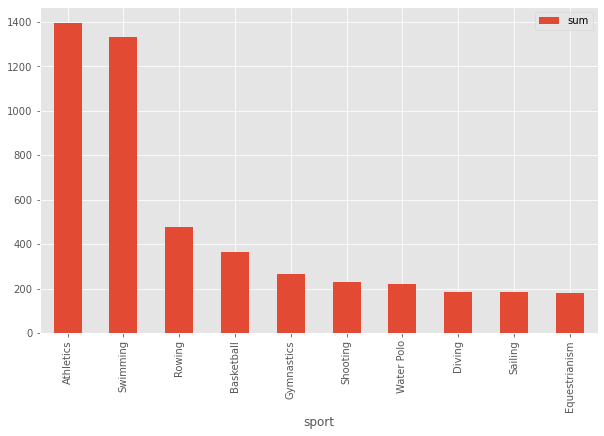

In [68]:
# Team USA's strongest summer sports, in terms of weighted sum of medals earned
sql = """
SELECT sport, SUM(CASE medal
             WHEN 'Gold' THEN 1
             WHEN 'Silver' THEN 2
             WHEN 'Bronze' THEN 1
             ELSE 0
             END)
FROM olympics
WHERE noc = 'USA' and season = 'Summer'
GROUP BY sport
ORDER BY sum DESC
LIMIT 10;
"""
df = sqlio.read_sql_query(sql, conn)
df.plot('sport', 'sum', kind='bar', figsize=(10, 6))

In [ ]:
# Close communication with the database
conn.close()